In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langcodes import *

In [2]:
df = pd.read_csv("shows.csv")

In [3]:
df.head()

,id,feed_url,title,subtitle,description,summary,author,email,link,language,explicit,image,category,subcategory,created_at,last_build_date
0,0002da5f-49a2-31ba-b44c-cdeabdf113cb,http://www.cbc.ca/podcasting/includes/dispatch...,Dispatches from CBC Radio,NaN,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio's Dispatches host Rick MacInnes-Rae ...,CBC Radio,podcasting@cbc.ca,http://www.cbc.ca/podcasting,en-ca,0,http://www.cbc.ca/podcasting/images/promo-disp...,News & Politics,Public Radio,2016-11-27T03:15:54,2016-11-27T03:15:54
1,00044845-beb8-35f3-99e2-01dbcfb6eb63,http://everydayissaturday.com/feed/podcast/,Motivation | Inspiration| Success with Entrepr...,Motivation - Inspiration - Success - Mindset -...,Sam Crowley delivers million dollar motivation...,Sam Crowley delivers million dollar motivation...,Sam Crowley,sam@everydayissaturday.com,http://everydayissaturday.com,en-us,0,http://everydayissaturday.com/wp-content/uploa...,Business,Business,2016-11-26T19:11:59,2016-11-21T14:19:34
2,00048bfa-8363-3f10-ac8e-8f27a31fe11f,http://disability411.jinkle.com/disability411.xml,Disability411 Podcast,NaN,Disability411 - The Podcast for Disability Inf...,NaN,Beth Case,NaN,http://disability411.jinkle.com/,en-us,0,NaN,Government & Organizations,Business,2016-11-27T00:37:30,2016-11-27T00:37:30
3,0005ab14-ea88-3038-b82c-86366713e96a,http://stevenredant.podomatic.com/rss2.xml,Steven Redant's Podcast,"Energy for your work out, your travels and you...",En example of what happened on my dance floor ...,En example of what happened on my dance floor ...,Steven Redant (the RedAnt),NaN,NaN,en-gb,0,https://assets.podomatic.net/ts/b8/34/09/steve...,Music,NaN,2016-11-26T18:37:07,2016-11-26T18:37:07
4,0005eac4-fa5d-3c33-a354-ad7928f3705b,http://api.spokenlayer.com/feed/channel/v1-wir...,WIRED News – Spoken Edition,NaN,Get in-depth coverage of current and future tr...,Get in-depth coverage of current and future tr...,WIRED,distribution@spokenlayer.com,http://www.spokenlayer.com,en,0,\n http://media.spokenlayer...,Technology,NaN,2016-11-27T06:46:08,2016-11-25T08:11:13


In [4]:
df.iloc[50]["description"]

"Damian Barr's Literary Salon lures the world's best writers to London to read exclusively from their latest greatest works."

In [5]:
num_shows = len(df)
num_shows

32832

In [6]:
def code_to_name(language_code):
    
    language_code = language_code.lower()
    
    dash_index = language_code.find("-")
    
    if language_code == "english" or language_code == "e":
        name = "English"
    elif dash_index == -1 and len(language_code) != 2:
        name = "Unknown"
    elif language_code == "中文":
        name = "Chinese"
    else:
        if dash_index != -1:
            language_code = language_code[:dash_index]
        if len(language_code) == 2 and Language.get(language_code).is_valid():
            name = Language.get(language_code).display_name()
        else:
            name = "Unknown"
            
    return name

In [7]:
code_to_name("中文")

'Chinese'

In [8]:
df["language"] = df["language"].apply(lambda x: code_to_name(str(x)))

In [9]:
unique_languages = pd.unique(df["language"])

In [10]:
len(unique_languages)

41

In [11]:
df["language"].value_counts()

English             30647
German                491
Unknown               402
Spanish               286
French                261
Portuguese            134
Japanese              102
Russian                85
Korean                 71
Chinese                69
Arabic                 53
Italian                52
Dutch                  27
Slovenian              26
Swedish                25
Czech                  17
Norwegian              11
Turkish                10
Hungarian               9
Danish                  6
Catalan                 6
Polish                  5
Romanian                4
Thai                    4
Punjabi                 3
Indonesian              3
Hebrew                  3
Persian                 3
Icelandic               2
Finnish                 2
Ukrainian               2
Lithuanian              2
Hindi                   1
Serbian                 1
Chamorro                1
Norwegian Bokmål        1
Swahili                 1
Greek                   1
Urdu        

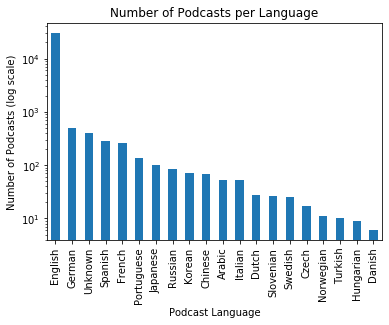

In [12]:
df["language"].value_counts()[:20].plot(kind = "bar", logy = True)
plt.xlabel("Podcast Language")
plt.ylabel("Number of Podcasts (log scale)")
plt.title("Number of Podcasts per Language")
plt.show()

In [13]:
unique_categories = pd.unique(df["category"])

In [14]:
len(unique_categories)

883

In [15]:
unique_categories

array(['News & Politics', 'Business', 'Government & Organizations',
       'Music', 'Technology', 'Education', nan, 'Info', 'Arts', 'Health',
       'Religion & Spirituality', 'Design', 'Sports', 'Romance',
       'Education/Language Courses', 'Sports & Recreation',
       'Games & Hobbies/Video Games', 'Society & Culture',
       'Official Podcast', 'Blogs', 'Games & Hobbies/Other Games',
       'Games & Hobbies', 'Arts/Literature', 'News', 'TV & Film',
       'Society & Culture/Philosophy',
       'Religion & Spirituality/Christianity', 'Technology/Gadgets',
       'Arts & Entertainment', 'Kids & Family', 'Children & Young Adults',
       'Comedy', 'Sports & Recreation:College & High School',
       'Public Radio', 'Technology/Software How-To',
       'Movies & Television', 'Podcasting', 'podcast',
       'sports, speedway, racing, cycles', 'Technology/Tech News',
       'Science Fiction', 'International', 'Health/Fitness & Nutrition',
       'Arts/Design', 'Sports & Recreation/Profe

In [16]:
subcategories = pd.unique(df["subcategory"])

In [17]:
len(subcategories)

218

In [18]:
subcategories

array(['Public Radio', 'Business', nan, 'Education', 'Arts',
       'Religion & Spirituality', 'Comedy', 'Society & Culture',
       'Technology', 'Religion & Spirituality/Christianity', 'Music',
       'Health', 'Sports & Recreation', 'Business/Management & Marketing',
       'Games & Hobbies', 'Kids & Family', 'News & Politics',
       'news and politics', 'Science & Medicine', 'TV & Film',
       'Movies & Television', 'Sports', 'Government & Organizations',
       'ARts/Performing Arts', 'Games & Hobbies/Video Games',
       'Arts/Literature', 'Religion&Spirituality', 'Tech News',
       'Transportation', 'Audio Blogs', 'Nature',
       'philosophical dialogue',
       'Government & Organizations -> Non-Profit',
       'Education/Language Courses', 'Social Science',
       'Business/Business News', 'Business/Careers', 'Video Games',
       'Government & Organizations/Non-Profit',
       'Sports & Recreation/Outdoor', 'Arts/Fashion & Beauty',
       'NEWS & POLITICS', 'Investing', '